In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

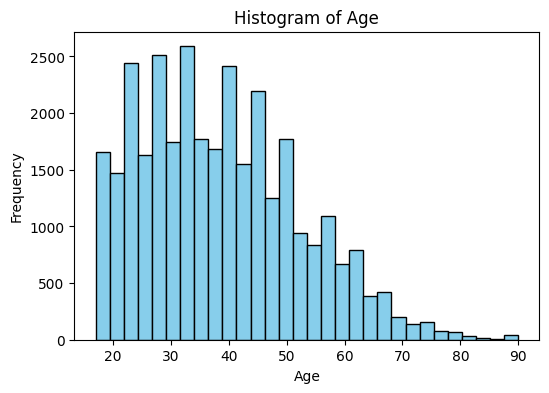

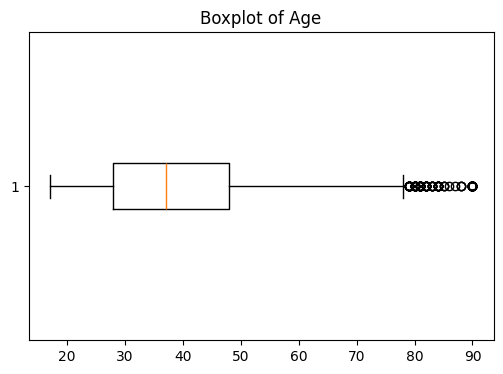

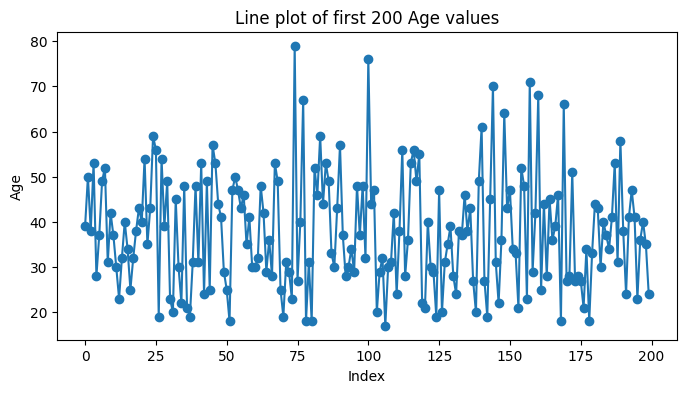

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

file_path = r"C:\Users\anon\Downloads\adult\adult.data"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]

df = pd.read_csv(file_path, header=None, names=columns, na_values=" ?", skipinitialspace=True)

df_clean = df.dropna() 

col = df_clean["age"]

mean_val = col.mean()
std_val = col.std()
df_clean = df_clean[(col >= mean_val - 3*std_val) & (col <= mean_val + 3*std_val)]


mean = col.mean()
trimmed_mean = stats.trim_mean(col, 0.1)
median = col.median()
variance = col.var()
std_dev = col.std()
mean_abs_dev = (col - mean).abs().mean()
median_abs_dev = stats.median_abs_deviation(col)


stats_df = pd.DataFrame({
    "mean": [mean],
    "trimmed_mean": [trimmed_mean],
    "median": [median],
    "variance": [variance],
    "std_dev": [std_dev],
    "mean_abs_dev": [mean_abs_dev],
    "median_abs_dev": [median_abs_dev]
})
stats_df.to_csv(r"C:\Users\anon\Downloads\adult\adult_statistics.csv", index=False)


df_clean["age_minmax"] = (col - col.min()) / (col.max() - col.min())
df_clean["age_zscore"] = (col - mean_val) / std_val
df_clean.to_csv(r"C:\Users\anon\Downloads\adult\adult_clean_normalized.csv", index=False)


plt.figure(figsize=(6,4))
plt.hist(col, bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig(r"C:\Users\anon\Downloads\adult\adult_histogram.png")
plt.show()


plt.figure(figsize=(6,4))
plt.boxplot(col, vert=False)
plt.title("Boxplot of Age")
plt.savefig(r"C:\Users\anon\Downloads\adult\adult_boxplot.png")
plt.show()


plt.figure(figsize=(8,4))
plt.plot(col.values[:200], marker='o')
plt.title("Line plot of first 200 Age values")
plt.xlabel("Index")
plt.ylabel("Age")
plt.savefig(r"C:\Users\anon\Downloads\adult\adult_lineplot.png")
plt.show()
